# Train a Variational Autoencoder for generating cat images

In [1]:
import numpy as np
from glob import glob
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from src.model import genModel
from src.vaeHelpers import *

%matplotlib inline

Using TensorFlow backend.


## Load the data

Load the data, create a training/validation split. Save the split to a file to help with continuation of training.

In [2]:
trainFresh = False

if ( trainFresh ):
    catFiles = np.array( glob('./catCropedBetter/*.jpg') )
    
    valFrac = 0.1
    n = len(catFiles)
    
    inds = np.random.permutation( len(catFiles) )
    trainInds, valInds = inds[ : -int(n*valFrac) ], inds[ -int(n*valFrac) : ]
    
    train, val = catFiles[ trainInds ], catFiles[ valInds ]
    
    writeFilesList( "trainCats.txt", train )
    writeFilesList( "valCats.txt", val )

else:
    val   = readSavedFiles( "valFiles.txt" )
    train = readSavedFiles( "trainFiles.txt" )

## Generate the model 

In [3]:
batchSize = 64
imgSize   = 128
codeSize  = 256 #4096
filters   = 256

encoder, decoder, VAE = genModel( imgSize = imgSize, lossType = "mse", codeSize = codeSize, filters = filters )
VAE.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
encoder (Model)              [(None, 256), (None, 256) 4716768   
_________________________________________________________________
decoder (Model)              (None, 128, 128, 3)       4715471   
Total params: 9,432,239
Trainable params: 9,397,033
Non-trainable params: 35,206
_________________________________________________________________


/home/baxter/Desktop/MLbook/catGenerator/src/model.py:96: UserWarning: Output "decoder" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "decoder" during training.
  VAE.compile( optimizer = opt, loss = None )


## Train the model

In [4]:
#if ( not trainFresh ):
    #VAE.load_weights( "weights/catGen_last.hdf5" )
    #VAE.load_weights( "weights/catGen.hdf5" )

earlyStopper = EarlyStopping( patience = 50, verbose = 1 )
checkPointer = ModelCheckpoint( filepath = "weights/catGen.hdf5", save_best_only = True, verbose = 1 )
rateReduce   = ReduceLROnPlateau( monitor = 'val_loss', factor = 0.5, patience = 20, cooldown = 5 )

losses = VAE.fit_generator( genBatch( train, batchSize, imgSize, True ),
                   validation_data = genBatch( val, batchSize, imgSize, False ),
                   epochs = 5000,
                   validation_steps = len(val)   // batchSize,
                   steps_per_epoch  = len(train) // batchSize,
                   callbacks = [ earlyStopper, checkPointer ] )
                   #callbacks = [ earlyStopper, checkPointer, rateReduce ] )

Epoch 1/5000
139/140 [============================>.] - ETA: 0s - loss: 2529.6525
Epoch 00001: val_loss improved from inf to 1613.73842, saving model to weights/catGen.hdf5
140/140 [==============================] - 36s 258ms/step - loss: 2519.8412 - val_loss: 1613.7384
Epoch 2/5000
139/140 [============================>.] - ETA: 0s - loss: 1344.2035
Epoch 00002: val_loss improved from 1613.73842 to 701.01233, saving model to weights/catGen.hdf5
140/140 [==============================] - 33s 233ms/step - loss: 1340.5466 - val_loss: 701.0123
Epoch 3/5000
139/140 [============================>.] - ETA: 0s - loss: 876.9627
Epoch 00003: val_loss did not improve
140/140 [==============================] - 32s 227ms/step - loss: 876.2759 - val_loss: 1104.3275
Epoch 4/5000
139/140 [============================>.] - ETA: 0s - loss: 715.7039
Epoch 00004: val_loss improved from 701.01233 to 545.31458, saving model to weights/catGen.hdf5
140/140 [==============================] - 32s 230ms/step - 

Epoch 35/5000
139/140 [============================>.] - ETA: 0s - loss: 416.7368
Epoch 00035: val_loss did not improve
140/140 [==============================] - 32s 229ms/step - loss: 416.2605 - val_loss: 370.5302
Epoch 36/5000
139/140 [============================>.] - ETA: 0s - loss: 399.9647
Epoch 00036: val_loss improved from 346.79662 to 345.81058, saving model to weights/catGen.hdf5
140/140 [==============================] - 32s 231ms/step - loss: 399.8708 - val_loss: 345.8106
Epoch 37/5000
139/140 [============================>.] - ETA: 0s - loss: 403.9994
Epoch 00037: val_loss did not improve
140/140 [==============================] - 33s 233ms/step - loss: 403.6541 - val_loss: 358.6928
Epoch 38/5000
139/140 [============================>.] - ETA: 0s - loss: 394.3440
Epoch 00038: val_loss improved from 345.81058 to 341.99222, saving model to weights/catGen.hdf5
140/140 [==============================] - 32s 229ms/step - loss: 394.0688 - val_loss: 341.9922
Epoch 39/5000
139/14

139/140 [============================>.] - ETA: 0s - loss: 361.1713
Epoch 00071: val_loss did not improve
140/140 [==============================] - 33s 232ms/step - loss: 361.6606 - val_loss: 319.1224
Epoch 72/5000
139/140 [============================>.] - ETA: 0s - loss: 371.2742
Epoch 00072: val_loss did not improve
140/140 [==============================] - 32s 229ms/step - loss: 371.0158 - val_loss: 336.7286
Epoch 73/5000
139/140 [============================>.] - ETA: 0s - loss: 356.0133
Epoch 00073: val_loss did not improve
140/140 [==============================] - 32s 229ms/step - loss: 355.7409 - val_loss: 328.8569
Epoch 74/5000
139/140 [============================>.] - ETA: 0s - loss: 353.0907
Epoch 00074: val_loss improved from 317.99964 to 317.03599, saving model to weights/catGen.hdf5
140/140 [==============================] - 32s 230ms/step - loss: 353.0510 - val_loss: 317.0360
Epoch 75/5000
139/140 [============================>.] - ETA: 0s - loss: 361.9567
Epoch 0007

Epoch 107/5000
139/140 [============================>.] - ETA: 0s - loss: 343.5299
Epoch 00107: val_loss did not improve
140/140 [==============================] - 32s 230ms/step - loss: 343.8466 - val_loss: 309.8700
Epoch 108/5000
139/140 [============================>.] - ETA: 0s - loss: 338.9901
Epoch 00108: val_loss did not improve
140/140 [==============================] - 32s 232ms/step - loss: 339.1016 - val_loss: 310.7951
Epoch 109/5000
139/140 [============================>.] - ETA: 0s - loss: 342.5429
Epoch 00109: val_loss did not improve
140/140 [==============================] - 33s 233ms/step - loss: 343.0582 - val_loss: 315.6293
Epoch 110/5000
139/140 [============================>.] - ETA: 0s - loss: 341.7857
Epoch 00110: val_loss did not improve
140/140 [==============================] - 32s 231ms/step - loss: 341.9846 - val_loss: 305.6547
Epoch 111/5000
139/140 [============================>.] - ETA: 0s - loss: 339.2527
Epoch 00111: val_loss did not improve
140/140 [==

Epoch 144/5000
139/140 [============================>.] - ETA: 0s - loss: 339.5734
Epoch 00144: val_loss did not improve
140/140 [==============================] - 32s 230ms/step - loss: 340.5840 - val_loss: 303.3195
Epoch 145/5000
139/140 [============================>.] - ETA: 0s - loss: 328.0730
Epoch 00145: val_loss did not improve
140/140 [==============================] - 33s 232ms/step - loss: 327.7105 - val_loss: 305.0990
Epoch 146/5000
139/140 [============================>.] - ETA: 0s - loss: 327.8391
Epoch 00146: val_loss did not improve
140/140 [==============================] - 33s 233ms/step - loss: 328.8128 - val_loss: 308.1262
Epoch 147/5000
139/140 [============================>.] - ETA: 0s - loss: 330.4504
Epoch 00147: val_loss did not improve
140/140 [==============================] - 32s 229ms/step - loss: 330.2453 - val_loss: 316.0548
Epoch 148/5000
139/140 [============================>.] - ETA: 0s - loss: 332.2359
Epoch 00148: val_loss did not improve
140/140 [==

Epoch 181/5000
139/140 [============================>.] - ETA: 0s - loss: 315.9900
Epoch 00181: val_loss did not improve
140/140 [==============================] - 33s 234ms/step - loss: 316.2583 - val_loss: 305.5174
Epoch 182/5000
139/140 [============================>.] - ETA: 0s - loss: 325.5729
Epoch 00182: val_loss did not improve
140/140 [==============================] - 32s 231ms/step - loss: 325.3202 - val_loss: 295.9047
Epoch 183/5000
139/140 [============================>.] - ETA: 0s - loss: 320.5732
Epoch 00183: val_loss did not improve
140/140 [==============================] - 32s 232ms/step - loss: 320.7594 - val_loss: 292.6907
Epoch 184/5000
139/140 [============================>.] - ETA: 0s - loss: 320.7120
Epoch 00184: val_loss did not improve
140/140 [==============================] - 32s 232ms/step - loss: 321.4813 - val_loss: 299.2435
Epoch 185/5000
139/140 [============================>.] - ETA: 0s - loss: 316.9464
Epoch 00185: val_loss did not improve
140/140 [==

Epoch 219/5000
139/140 [============================>.] - ETA: 0s - loss: 318.9827
Epoch 00219: val_loss did not improve
140/140 [==============================] - 32s 226ms/step - loss: 318.7671 - val_loss: 298.8645
Epoch 220/5000
139/140 [============================>.] - ETA: 0s - loss: 322.2962
Epoch 00220: val_loss did not improve
140/140 [==============================] - 32s 231ms/step - loss: 322.1451 - val_loss: 291.1271
Epoch 221/5000
139/140 [============================>.] - ETA: 0s - loss: 311.6299
Epoch 00221: val_loss did not improve
140/140 [==============================] - 32s 230ms/step - loss: 311.8141 - val_loss: 296.1252
Epoch 222/5000
139/140 [============================>.] - ETA: 0s - loss: 313.3461
Epoch 00222: val_loss did not improve
140/140 [==============================] - 32s 231ms/step - loss: 313.2201 - val_loss: 297.0917
Epoch 223/5000
139/140 [============================>.] - ETA: 0s - loss: 316.5993
Epoch 00223: val_loss did not improve
140/140 [==

Epoch 257/5000
139/140 [============================>.] - ETA: 0s - loss: 316.9464
Epoch 00257: val_loss did not improve
140/140 [==============================] - 32s 231ms/step - loss: 317.2669 - val_loss: 292.6513
Epoch 258/5000
139/140 [============================>.] - ETA: 0s - loss: 310.0023
Epoch 00258: val_loss did not improve
140/140 [==============================] - 32s 229ms/step - loss: 310.1818 - val_loss: 291.0450
Epoch 259/5000
139/140 [============================>.] - ETA: 0s - loss: 316.0099
Epoch 00259: val_loss did not improve
140/140 [==============================] - 32s 230ms/step - loss: 315.7045 - val_loss: 293.3744
Epoch 260/5000
139/140 [============================>.] - ETA: 0s - loss: 308.9876
Epoch 00260: val_loss did not improve
140/140 [==============================] - 32s 231ms/step - loss: 308.8545 - val_loss: 293.9495
Epoch 261/5000
139/140 [============================>.] - ETA: 0s - loss: 320.0296
Epoch 00261: val_loss did not improve
140/140 [==

## Plot a learning curve

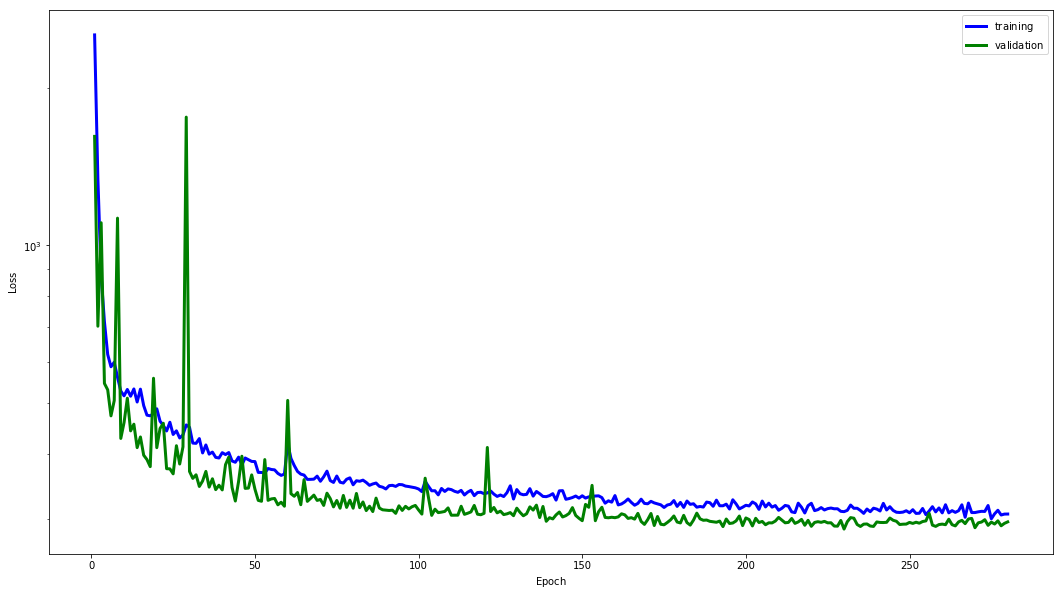

In [5]:
plotLosses( losses.history )

In [6]:
VAE.save_weights( "weights/catGen_last.hdf5" )